In [19]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


# Figure 1B: ROC example

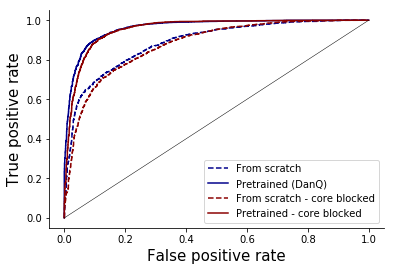

In [21]:
factor = "SP1"

scratch_f = "/storage/pandaman/project/AgentBind-GM12878-DanQ-from-scratch/storage/AgentBind-GM12878-DanQ/results/c/%s+GM12878/lable-logit.txt"%factor
pretrain_danq_f = "/storage/pandaman/project/AgentBind-GM12878-DanQ-fixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/%s+GM12878/lable-logit.txt"%factor
scratch_f_b = "/storage/pandaman/project/AgentBind-GM12878-DanQ-from-scratch/storage/AgentBind-GM12878-DanQ/results/b/%s+GM12878/lable-logit.txt"%factor
pretrain_danq_f_b = "/storage/pandaman/project/AgentBind-GM12878-DanQ-fixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/b/%s+GM12878/lable-logit.txt"%factor

scratch = pd.read_csv(scratch_f, sep="\t", names=["label","score"])
pretrain_danq = pd.read_csv(pretrain_danq_f, sep="\t", names=["label","score"])
scratch_b = pd.read_csv(scratch_f_b, sep="\t", names=["label","score"])
pretrain_danq_b = pd.read_csv(pretrain_danq_f_b, sep="\t", names=["label","score"])

fpr_scratch, tpr_scratch, thresholds_scratch = roc_curve(scratch["label"], scratch["score"])
fpr_pre_danq, tpr_pre_danq, thresholds_pre_danq = roc_curve(pretrain_danq["label"], pretrain_danq["score"])
fpr_scratch_b, tpr_scratch_b, thresholds_scratch_b = roc_curve(scratch_b["label"], scratch_b["score"])
fpr_pre_danq_b, tpr_pre_danq_b, thresholds_pre_danq_b = roc_curve(pretrain_danq_b["label"], pretrain_danq_b["score"])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr_scratch, tpr_scratch, color="darkblue", linestyle="dashed", label="From scratch");
ax.plot(fpr_pre_danq, tpr_pre_danq, color="darkblue", label="Pretrained (DanQ)");
ax.plot(fpr_scratch_b, tpr_scratch_b, color="darkred", linestyle="dashed", label="From scratch - core blocked");
ax.plot(fpr_pre_danq_b, tpr_pre_danq_b, color="darkred", label="Pretrained - core blocked");
ax.plot([0,1],[0,1], color="black", linewidth=0.5)
ax.legend(loc="lower right")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("False positive rate", size=15);
ax.set_ylabel("True positive rate", size=15);

fig.savefig("example_roc_%s+GM12878.pdf"%factor)

# Figure 1C: IMPACT comparison

In [ ]:
scores = {
    "Foxp3-IMPACT": [],
    "Foxp3-AB": [],
    "Gata3-IMPACT": [],
    "Gata3-AB": [],
    "Stat3-IMPACT": [],
    "Gata3-AB": [],
    "Tbet-IMPACT": [],
    "Tbaet-AB": []
}

for i in range(1, 11):
    sumdata = pd.read_csv("/storage/pandaman/project/AgentBind-IMPACT/results-c%s/c/auc_summary.txt"%i, names=["TF","AB","IMPACT"], sep="\t")
    
    